In [2]:
from load_EEGs_improved import EEGDataset

In [3]:
%matplotlib inline
import sys
import numpy as np
import matplotlib.pyplot as plt
sys.path.append("./forward_model/")
import stacklineplot
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10 * 5

In [4]:
# data_file = "/mnt/data1/eegdbs/eegdata_summary-2017-10-26.csv"
data_file = None
real_eegs = EEGDataset("/mnt/data1/eegdbs/SEC-0.1/stanford/", csv_file=data_file, num_examples=64 * 1, num_channels=44,
                       length=1004, delay=10000)

Number of files found: 64 Length: 1004


In [5]:
real_eegs.shuffle()
real_eegs[0][0].numpy().shape

(1004, 44)

In [36]:
index = 6

In [37]:
sample = real_eegs[0][index].numpy()

In [38]:
sample.shape

(1004, 44)

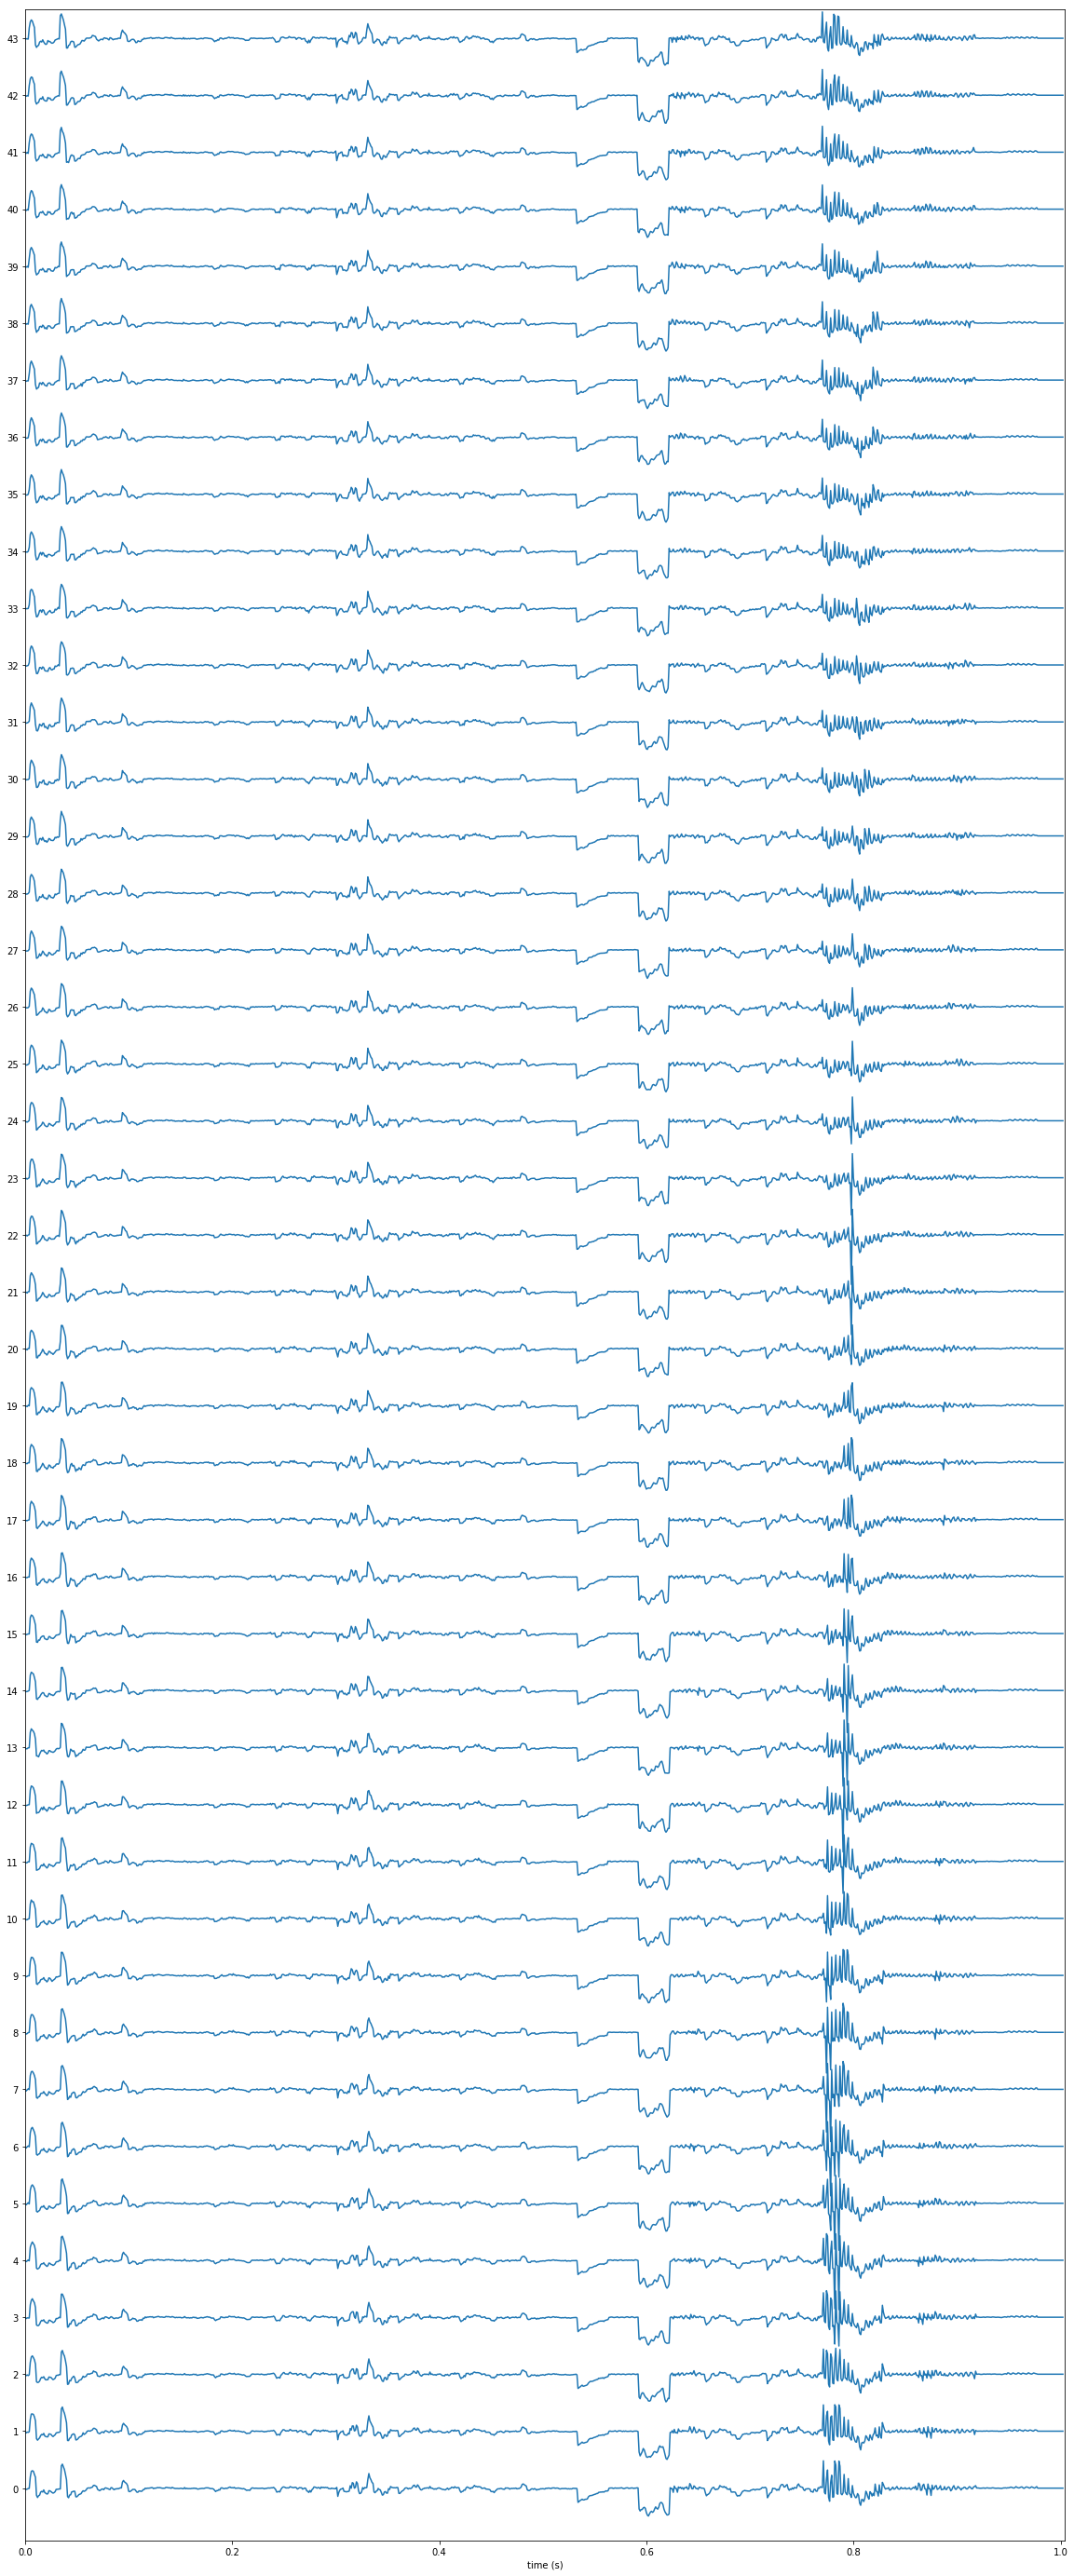

In [39]:
stacklineplot.stackplot(sample.T, seconds=1004/1000, ylabels=list(range(44)), yscale=1)

### Vizualize with Fast Fourier Transform

In [40]:
from scipy import signal

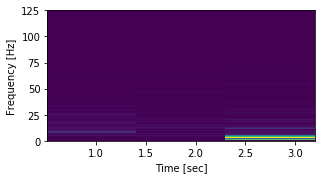

In [45]:
f, t, Sxx = signal.spectrogram(sample.T[:][13], fs=250)#,
#                                       nperseg=1004)#,
#                                       detrend=False, scaling='spectrum')
plt.subplots(figsize=(4.8, 2.4))
plt.pcolormesh(t, f, Sxx, cmap='viridis')
# ax.pcolormesh(times, freqs / 1000, 10 * np.log10(Sx), cmap='viridis')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()